# データの読み込み

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd

In [6]:
# csvデータの読み込み
df = pd.read_csv('housing.csv')

In [9]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


# 分布の確認

In [11]:
import seaborn as sns

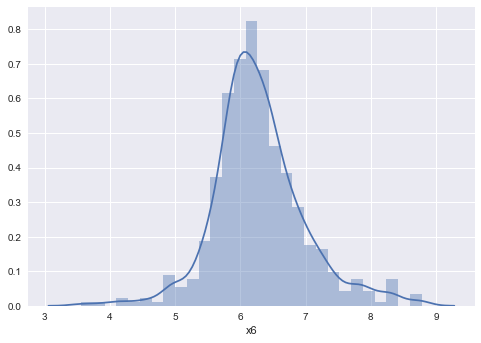

In [23]:
sns.distplot(df['x6'])

# 外れ値除去(3σ法)

In [15]:
col = 'x6'

In [17]:
mean = df.mean()
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [19]:
# 平均
mean[col]

6.284634387351788

In [25]:
# 標準偏差(standard deviation)
sigma = df.std()
sigma

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64

In [27]:
sigma[col]

0.7026171434153234

In [28]:
# 3σ分引く
low = mean[col] - 3 * sigma[col]
low

4.176782957105817

In [30]:
# 3σ分足す
high = mean[col] + 3 * sigma[col]
high

8.392485817597759

In [33]:
# フィルタリング
df2 =df[(df[col] > low) & (df[col] < high)]

In [35]:
len(df)

506

In [36]:
len(df2)

498

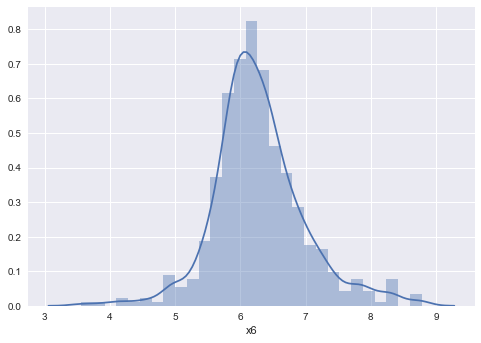

In [37]:
# 分布の再確認(オリジナル)
sns.distplot(df['x6'])

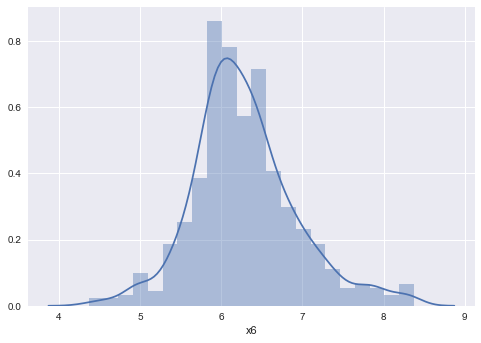

In [38]:
# 分布の再確認(外れ値除去)
sns.distplot(df2['x6'])